Experiment report:

Eksperyment nr 1

12:21 – system uruchomiony
12:29 – błąd przy zmianie taśmociągu – otwarcie i zamkniecie klatki robota manipulacyjnego

12:32 Aktualny stan zleceń produkcyjnych 

Current orders (CP Factory database)

12:38 – Restart Fleet Managera (robotino)
12:41 – Robotino wnawia pracę
12:41 – Stwierdzono brak bezpieczników w podajniku
12:44 – Uzupełniono braki i wznowiono montaż
12:45– Restart Fleet Managera (robotino)
12:48 – Reset układnicy magazynu (zatrzymanie taśmociągu)

12:50 Aktualny stan zleceń produkcyjnych 

Current orders (CP Factory database)

12:55 – Błąd wydawania ze stosu
12: 56 – Błąd usunięty, wznowienie wydawania
13:03 – Koniec cyklu

Eksperyment nr 2
Płytki PCB w gniazdach 2 i 3 kontenra obrócone o 180

13:14 – złożenie zleceń
	
13:15 Reset magazynu i start 
13:18 Refill magazynu
13: 19 Pierwsze pobranie z magazynu



# Time Series Analysis: Data exploration 

## Libraries

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



In [2]:
#Read data from first sensor
df_dane_z_testu_sensor_1 = pd.read_csv('http91.223.68.1408080_6d7f5350-f650-48ec-ac88-715c96302d94.txt',  sep=',', encoding='latin1',parse_dates=['time'])

#Read data from second sensor
df_dane_z_testu_sensor_2 = pd.read_csv('http91.223.68.1408080_bd87a6ec-142f-4cec-a021-a86ae521fbb6.txt',  sep=',', encoding='latin1',parse_dates=['time'])


#Renaming columns
df_dane_z_testu_sensor_1.columns=['date','x_1','y_1','z_1']
df_dane_z_testu_sensor_1['date']=pd.to_datetime(df_dane_z_testu_sensor_1.date)

df_dane_z_testu_sensor_2.columns=['date','x_2','y_2','z_2']
df_dane_z_testu_sensor_2['date']=pd.to_datetime(df_dane_z_testu_sensor_2.date)

df_dane_z_testu_sensor_1.head()

#Merging data from wrzeciono gorne and wrzeciono dolne such that both measurments are time aligned
input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input
df.date=df.date-pd.DateOffset(hours=1)
#df.set_index('date', inplace=True)
X=input
#X.drop(['date'], axis=1, inplace=True)

names=X.columns
names


Index(['date', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2'], dtype='object')

#### Display raw data as is

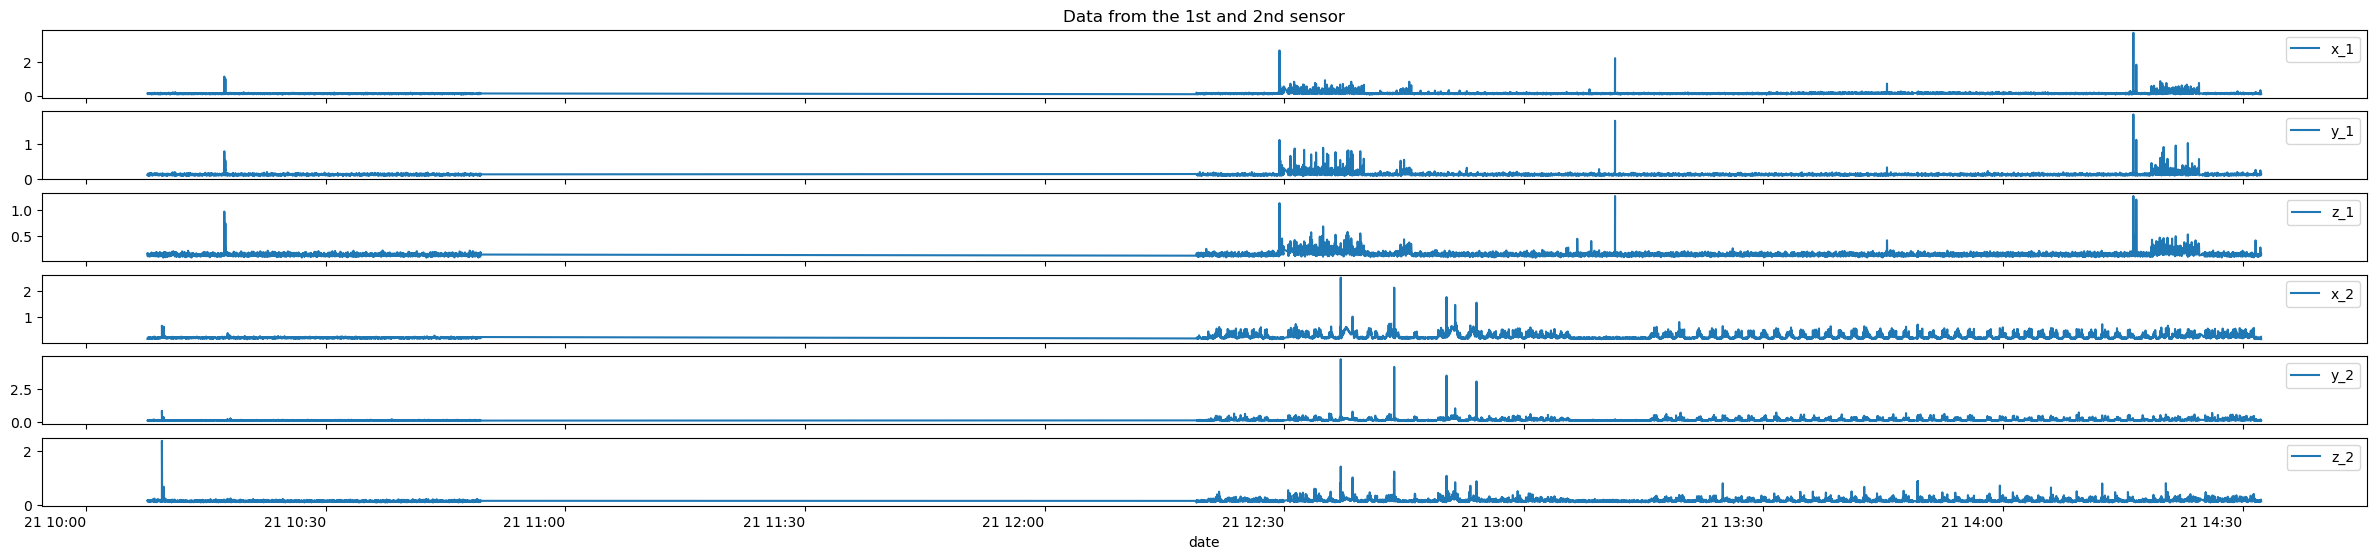

In [3]:
fig, axes = plt.subplots(6,1, figsize=(30,7), dpi=100)
merged_data=df

merged_data.plot(title='Data from the 1st and 2nd sensor', legend=True, ax=axes[0],use_index=True,x='date',y='x_1')
merged_data.plot(legend=True, ax=axes[1],use_index=True,x='date',y='y_1')
merged_data.plot( legend=True, ax=axes[2],use_index=True,x='date',y='z_1')
merged_data.plot(legend=True, ax=axes[3],use_index=True,x='date',y='x_2')
merged_data.plot( legend=True, ax=axes[4],use_index=True,x='date',y='y_2')
merged_data.plot(legend=True, ax=axes[5],use_index=True,x='date',y='z_2')
#lt.axvline(x=merged_data.date[0], color='r', linestyle='-')

fig.autofmt_xdate(bottom=0.2, rotation=0, ha='right')



In [67]:
## Getting indices of time stamps from Slawmoir report

input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input
df.date=df.date-pd.DateOffset(hours=1)  # timezone correction
df.set_index('date', inplace=True) # set time column as index 


#time_stamp_0=
time_stamp_1=max(df[df.index < '2022-01-21 12:21:00'].index) # system uruchomiony
time_stamp_2=max(df[df.index < '2022-01-21 12:29:00'].index) # blad / tasmociag
time_stamp_3=max(df[df.index < '2022-01-21 12:32:00'].index) # aktualny stan
time_stamp_4=max(df[df.index < '2022-01-21 12:38:00'].index) # restart robotino
time_stamp_5=max(df[df.index < '2022-01-21 12:41:00'].index) # robotino wznawia
time_stamp_6=max(df[df.index < '2022-01-21 12:41:00'].index) # brak bezp. / podajnik
time_stamp_7=max(df[df.index < '2022-01-21 12:44:00'].index) # uzup. i wznowienie montazu
time_stamp_8=max(df[df.index < '2022-01-21 12:45:00'].index) # restart robotino
time_stamp_9=max(df[df.index < '2022-01-21 12:48:00'].index) # zatrzymanie tasmociagu
time_stamp_10=max(df[df.index < '2022-01-21 12:50:00'].index) # aktualny stan
time_stamp_11=max(df[df.index < '2022-01-21 12:55:00'].index) # blad wydawania ze stosu
time_stamp_12=max(df[df.index < '2022-01-21 12:56:00'].index) # wznowienie
time_stamp_13=max(df[df.index < '2022-01-21 13:03:00'].index) # koniec cyklu
time_stamp_14=max(df[df.index < '2022-01-21 13:14:00'].index) # zlozenie zlecen
time_stamp_15=max(df[df.index < '2022-01-21 13:15:00'].index) # reset magazynu / start
time_stamp_16=max(df[df.index < '2022-01-21 13:18:00'].index) # refill magazynu
time_stamp_17=max(df[df.index < '2022-01-21 13:19:00'].index) # pierwsze pobr. z mag. 

### oridnal position of timestamps

comments=['system uruchomiony','blad / tasmociag','aktualny stan','restart robotino','robotino wznawia','brak bezp. / podajnik','uzup. i wznowienie montazu','restart robotino','zatrzymanie tasmociagu','aktualny stan','blad wydawania ze stosu','wznowienie','koniec cyklu','zlozenie zlecen','reset magazynu / start','refill magazynu','pierwsze pobr. z mag.']

timestamp_marks=[]
timestamp_comments=[]

for i in range (1,18):

    name='time_stamp_'+str(i)

    timestamp_marks.append(df.index.searchsorted(eval(name)))

    timestamp_comments.append(comments[i-1])


In [5]:
timestamp_comments

['system uruchomiony',
 'blad / tasmociag',
 'aktualny stan',
 'restart robotino',
 'robotino wznawia',
 'brak bezp. / podajnik',
 'uzup. i wznowienie montazu',
 'restart robotino',
 'zatrzymanie tasmociagu',
 'aktualny stan',
 'blad wydawania ze stosu',
 'wznowienie',
 'koniec cyklu',
 'zlozenie zlecen',
 'reset magazynu / start',
 'refill magazynu',
 'pierwsze pobr. z mag.']

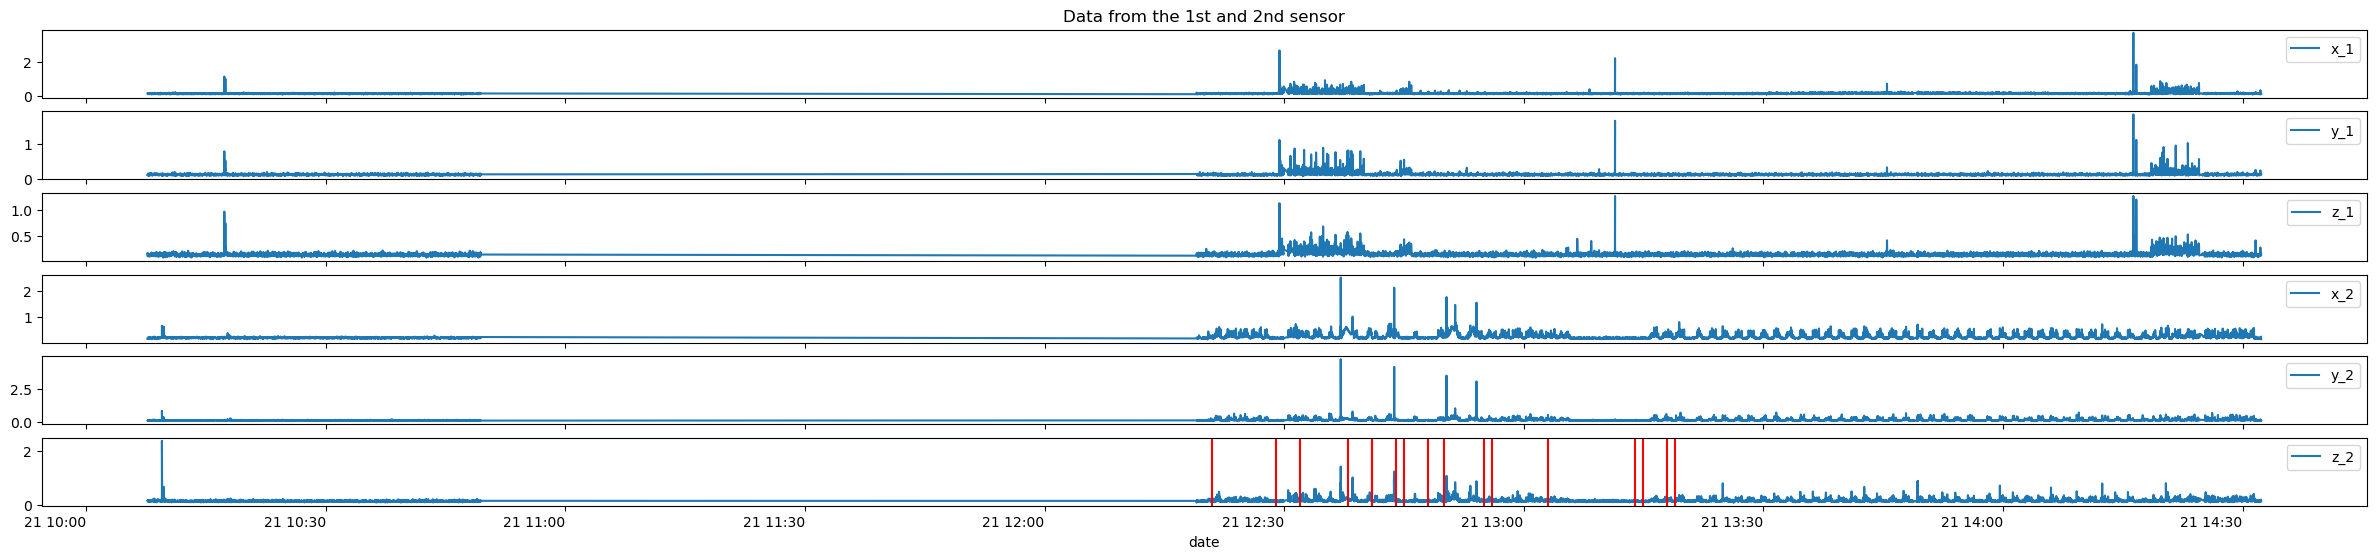

In [6]:
fig, axes = plt.subplots(6,1, figsize=(30,7), dpi=100)

input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input
df.date=df.date-pd.DateOffset(hours=1)

merged_data=df
merged_data.plot(title='Data from the 1st and 2nd sensor', legend=True, ax=axes[0],use_index=True,x='date',y='x_1')
merged_data.plot(legend=True, ax=axes[1],use_index=True,x='date',y='y_1')
merged_data.plot( legend=True, ax=axes[2],use_index=True,x='date',y='z_1')
merged_data.plot(legend=True, ax=axes[3],use_index=True,x='date',y='x_2')
merged_data.plot( legend=True, ax=axes[4],use_index=True,x='date',y='y_2')
merged_data.plot(legend=True, ax=axes[5],use_index=True,x='date',y='z_2')
for i in range (0,len(timestamp_marks)):

    plt.axvline(x=merged_data.date[timestamp_marks[i]], color='r', linestyle='-')

fig.autofmt_xdate(bottom=0.2, rotation=0, ha='right')

In time series analysis, it is important that the data is stationary and have no autocorrelation. Stationarity refers to the behavior where the mean and standard deviation of the data changes over time, the data with such behavior is considered not stationary. On the other hand, autocorrelation refers to the behavior of the data where the data is correlated with itself in a different time period.

Next, we will visually inspect the stationarity of each feature in the data set and the following code will do just that. Later, we will also perform the Dickey Fuller test to quantitatively verify the observed stationarity. In addition, we will inspect the autocorrelation of the features before feeding them into the clustering algorithms to detect anomalies.

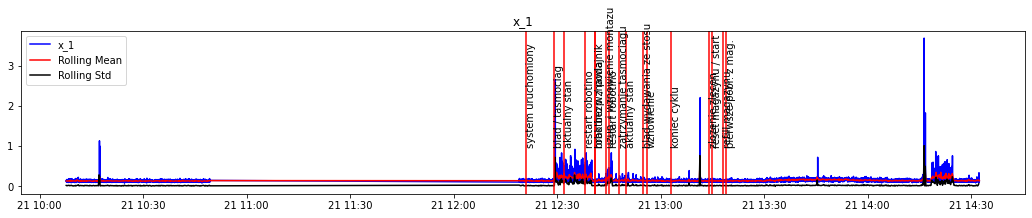

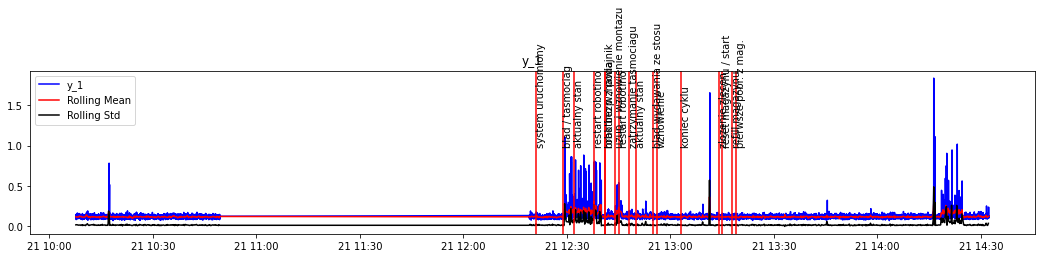

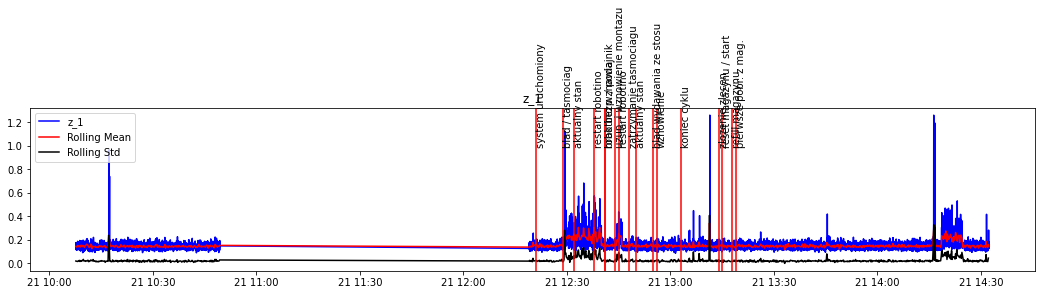

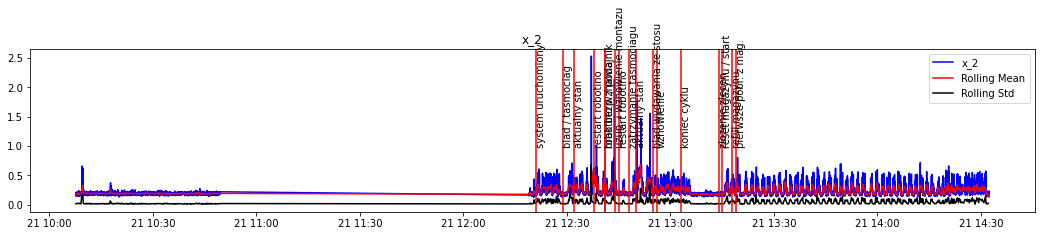

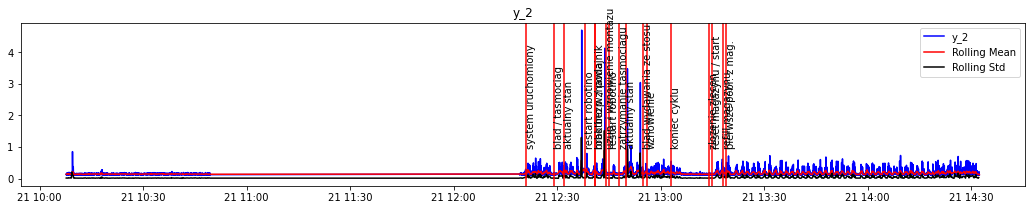

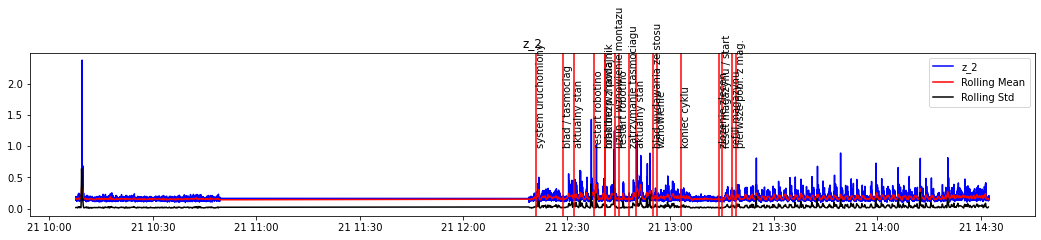

In [7]:

## Cut data to start from 1st experiment

input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input
df.date=df.date-pd.DateOffset(hours=1)
input.set_index('date', inplace=True)
X=input
#X.drop(['date'], axis=1, inplace=True)
names=X.columns

df_time_cut=df.truncate(before=timestamp_marks[0]-1)

# Resample the entire dataset by 10 second averaging
rollmean = input.resample(rule='10S').mean().dropna()
rollstd = input.resample(rule='10S').std().dropna()




# Plot time series for each sensor and component with its mean and standard deviation
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(input[name], color='blue', label=name)
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    for i in range (0,len(timestamp_marks)):

        plt.axvline(x=merged_data.date[timestamp_marks[i]], color='r', linestyle='-')
        plt.text(merged_data.date[timestamp_marks[i]], 1, timestamp_comments[i],rotation=90)
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    
   
    plt.show()

#trans = plt.get_xaxis_transform()

#x = 10
#plt.axvline(x)




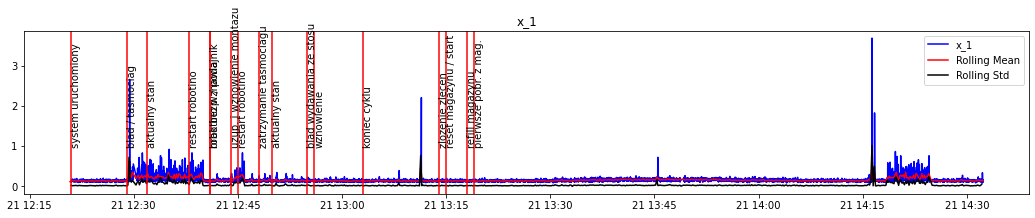

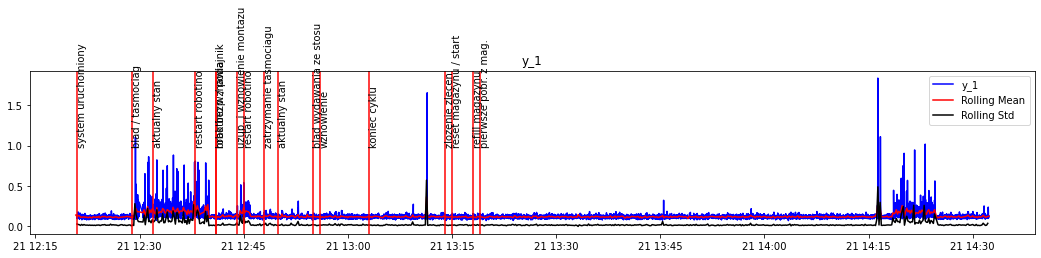

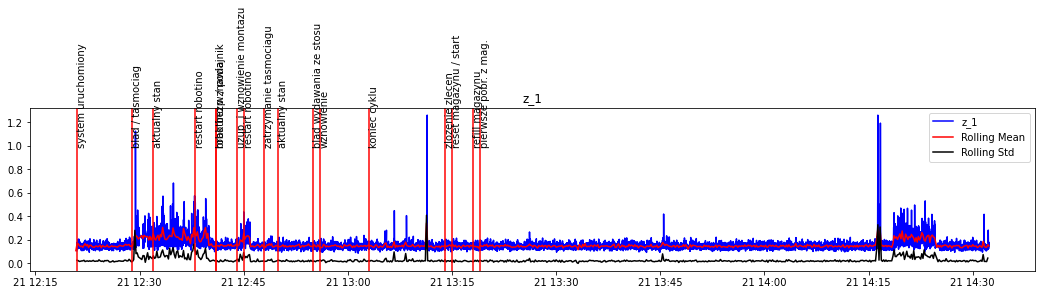

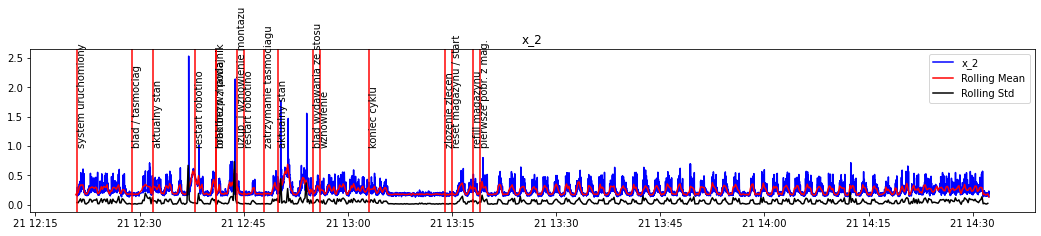

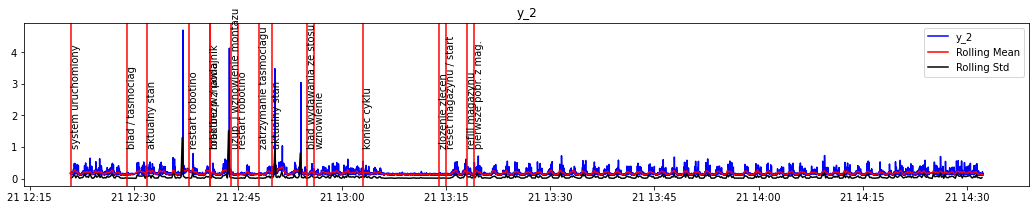

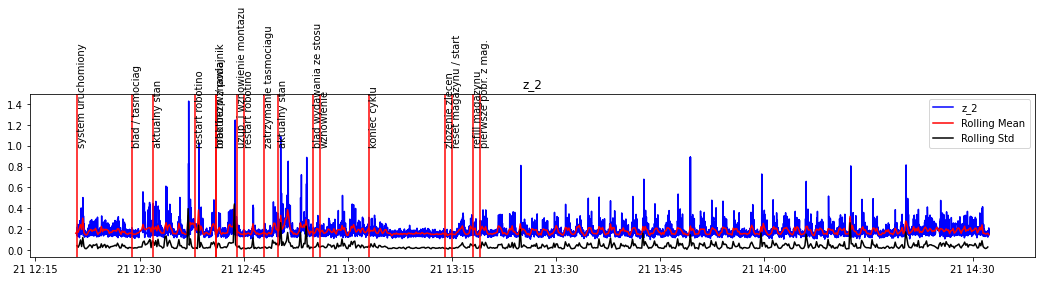

In [8]:

## Cut data to start from 1st experiment

input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input
df.date=df.date-pd.DateOffset(hours=1)
input.set_index('date', inplace=True)
X=input
#X.drop(['date'], axis=1, inplace=True)
names=X.columns

df_time_cut=df.truncate(before=time_stamp_1) ## cut to data to the time span of experiment

# Resample the entire dataset by 10 second averaging
rollmean = df_time_cut.resample(rule='10S').mean().dropna()
rollstd = df_time_cut.resample(rule='10S').std().dropna()




# Plot time series for each sensor and component with its mean and standard deviation
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df_time_cut[name], color='blue', label=name)
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    for i in range (0,len(timestamp_marks)):

        plt.axvline(x=merged_data.date[timestamp_marks[i]], color='r', linestyle='-')
        plt.text(merged_data.date[timestamp_marks[i]], 1, timestamp_comments[i],rotation=90)
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    
   
    plt.show()

In [9]:
df_time_cut

,x_1,y_1,z_1,x_2,y_2,z_2
date,,,,,,
2022-01-21 12:20:59,0.11769,0.14042,0.10833,0.17035,0.17003,0.16030
2022-01-21 12:21:00,0.11156,0.09953,0.12656,0.18899,0.13168,0.13862
2022-01-21 12:21:01,0.10665,0.10419,0.18016,0.22951,0.14024,0.14116
2022-01-21 12:21:02,0.10988,0.10404,0.16400,0.18626,0.12977,0.19440
2022-01-21 12:21:03,0.13234,0.11461,0.13815,0.30052,0.21923,0.22222
...,...,...,...,...,...,...
2022-01-21 14:32:16,0.12294,0.10797,0.18344,0.19578,0.11103,0.14879
2022-01-21 14:32:17,0.14680,0.10407,0.12506,0.18980,0.13486,0.15496
2022-01-21 14:32:18,0.09810,0.11375,0.16384,0.22353,0.16517,0.21077


Compute PCA components to reduce the number of parameters from 6 to 2

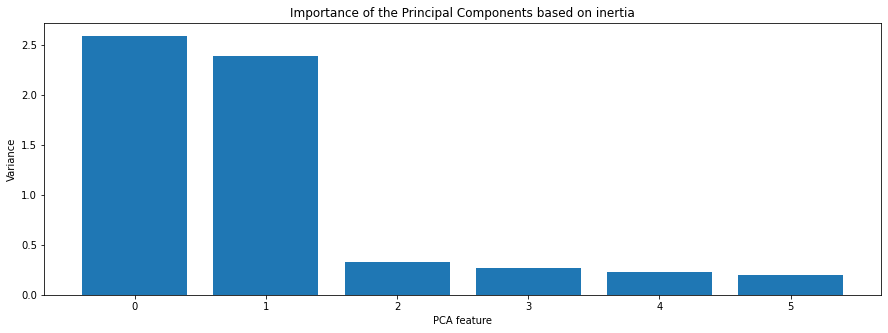

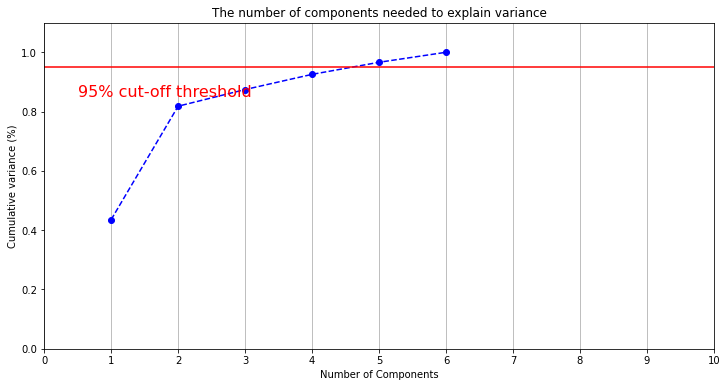

In [10]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
### For the PCA analysis we first scale the data (preprocess) then we measure how much components are meaningful in terms of explaining the variance of our data
# Extract the names of the numerical columns and scale the data

#Read data from first sensor
df_dane_z_testu_sensor_1 = pd.read_csv('http91.223.68.1408080_6d7f5350-f650-48ec-ac88-715c96302d94.txt',  sep=',', encoding='latin1',parse_dates=['time'])

#Read data from second sensor
df_dane_z_testu_sensor_2 = pd.read_csv('http91.223.68.1408080_bd87a6ec-142f-4cec-a021-a86ae521fbb6.txt',  sep=',', encoding='latin1',parse_dates=['time'])

df_dane_z_testu_sensor_1.columns=['date','x_1','y_1','z_1']
df_dane_z_testu_sensor_1['date']=pd.to_datetime(df_dane_z_testu_sensor_1.date)

df_dane_z_testu_sensor_2.columns=['date','x_2','y_2','z_2']
df_dane_z_testu_sensor_2['date']=pd.to_datetime(df_dane_z_testu_sensor_2.date)

input=pd.merge(df_dane_z_testu_sensor_1,df_dane_z_testu_sensor_2,how='inner',on='date')
df=input

df.date=df.date-pd.DateOffset(hours=1)


df.set_index('date', inplace=True)
df2 = df
names=df2.columns

df_time_cut=df.truncate(before=time_stamp_1) ## cut to data to the time span of experiment

x = df_time_cut[names]

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()
#Another approach to select PCA (just to compare, see different visualization)
scaled_data = scaler.fit_transform(df)
pca = PCA().fit(scaled_data)



plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [199]:
df_time_cut

,x_1,y_1,z_1,x_2,y_2,z_2
date,,,,,,
2022-01-21 12:20:59,0.11769,0.14042,0.10833,0.17035,0.17003,0.16030
2022-01-21 12:21:00,0.11156,0.09953,0.12656,0.18899,0.13168,0.13862
2022-01-21 12:21:01,0.10665,0.10419,0.18016,0.22951,0.14024,0.14116
2022-01-21 12:21:02,0.10988,0.10404,0.16400,0.18626,0.12977,0.19440
2022-01-21 12:21:03,0.13234,0.11461,0.13815,0.30052,0.21923,0.22222
...,...,...,...,...,...,...
2022-01-21 14:32:16,0.12294,0.10797,0.18344,0.19578,0.11103,0.14879
2022-01-21 14:32:17,0.14680,0.10407,0.12506,0.18980,0.13486,0.15496
2022-01-21 14:32:18,0.09810,0.11375,0.16384,0.22353,0.16517,0.21077


In [11]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])


merged_data=df


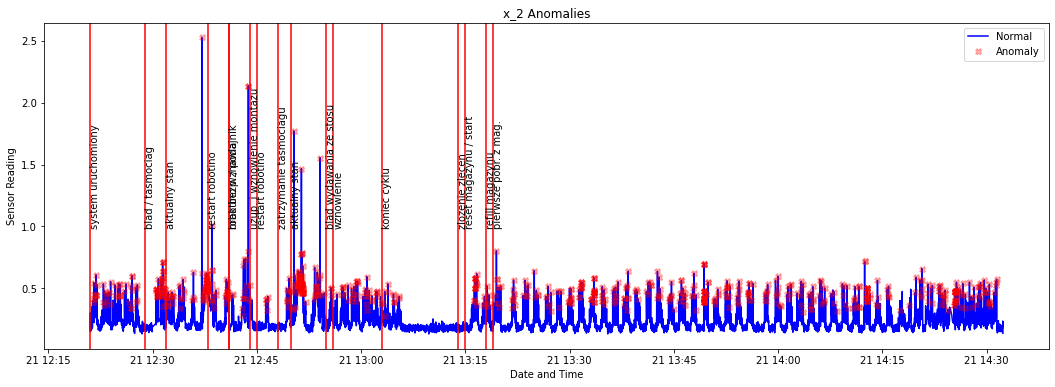

In [12]:
#Resetting index column just to ease the further processing
df_time_cut=df.truncate(before=time_stamp_1) ## cut to data to the time span of experiment

df_time_cut.reset_index(drop=True, inplace=True)
#df_time_cut=df.truncate(before=time_stamp_1)
df_time_cut['pc1']=principalDf['pc1']
df_time_cut['pc2']=principalDf['pc2']


# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df_time_cut['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Filter out the outliers from the pc1
df_time_cut['anomaly_pc1'] = ((df_time_cut['pc1']>upper_pc1) | (df_time_cut['pc1']<lower_pc1)).astype('int')
# Calculate IQR for the 2nd principal component (pc2)
q1_pc2, q3_pc2 = df_time_cut['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
# Calculate upper and lower bounds for outlier for pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
# Filter out the outliers from the pc2
df_time_cut['anomaly_pc2'] = ((df_time_cut['pc2']>upper_pc2) | (df_time_cut['pc2']<lower_pc2)).astype('int')
# Let's plot the outliers from pc1 on top of the x_dolny and see where they occured in the time series
a = df_time_cut[df_time_cut['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))

###Extract elemtnes of the orignal df based on indexes of picked anomalies
df_time_cut=df.truncate(before=time_stamp_1)
df_anomaly=df_time_cut.iloc[a.index,:]

# Bring back index
#df_time_cut=df.truncate(before=time_stamp_1)
#df_time_cut.set_index('date', inplace=True)

_ = plt.plot(df_time_cut['x_2'], color='blue', label='Normal')
_ = plt.plot(df_anomaly['x_2'], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('x_2 Anomalies')
    
for i in range (0,len(timestamp_marks)):

    plt.axvline(x=merged_data.index[timestamp_marks[i]], color='r', linestyle='-')
    plt.text(merged_data.index[timestamp_marks[i]], 1, timestamp_comments[i],rotation=90)
_ = plt.legend(loc='best')

plt.show();




        #plt.axvline(x=merged_data.date[timestamp_marks[i]], color='r', linestyle='-')
        #plt.text(merged_data.date[timestamp_marks[i]], 1, timestamp_comments[i],rotation=90)



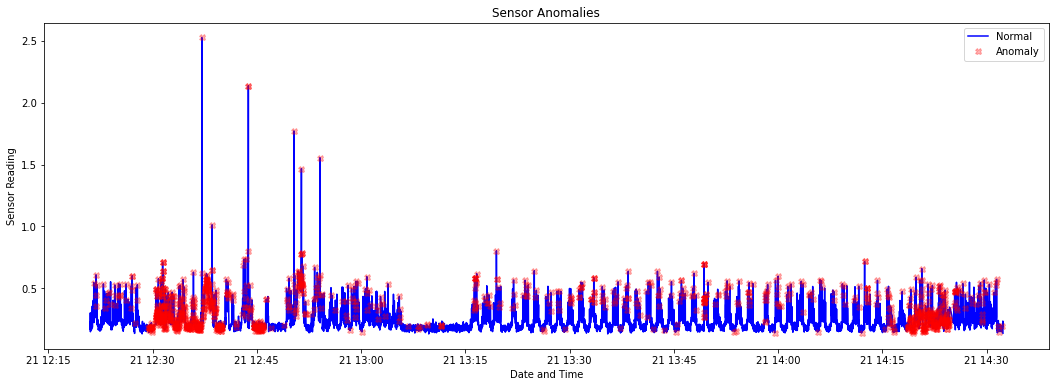

In [18]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies
 
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))
# visualization
df_time_cut['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df_time_cut.index)
a_2 = df_time_cut.loc[df_time_cut['anomaly2'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_time_cut['x_2'], color='blue', label='Normal')
_ = plt.plot(a_2['x_2'], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor Anomalies')
_ = plt.legend(loc='best')
plt.show();

More detailed analysis based on 'Current order list' output  

In [15]:
time_stamp_1_Co=max(df[df.index < '2022-01-21 12:27:04'].index) # 2601 Planned Start
time_stamp_2_Co=max(df[df.index < '2022-01-21 12:27:19'].index) # Order 1
time_stamp_3_Co=max(df[df.index < '2022-01-21 12:27:40'].index) # Order 2
time_stamp_4_Co=max(df[df.index < '2022-01-21 12:27:57'].index) # Order 3
time_stamp_5_Co=max(df[df.index < '2022-01-21 12:28:15'].index) # Order 4

time_stamp_6_Co=max(df[df.index < '2022-01-21 12:28:12'].index) # 2602 Planned Start

time_stamp_7_Co=max(df[df.index < '2022-01-21 12:28:33'].index) # Order 1
time_stamp_8_Co=max(df[df.index < '2022-01-21 12:29:30'].index) # Order 2
time_stamp_9_Co=max(df[df.index < '2022-01-21 12:29:49'].index) # Order 3
time_stamp_10_Co=max(df[df.index < '2022-01-21 12:30:09'].index) # Order 4



In [16]:
### oridnal position of timestamps

comments=['2601 Planned Start','Order 1','Order 2','Order 3','Order 4','2602 Planned Start','Order 1','Order 2','Order 3','Order 4']

timestamp_marks_Co=[]
timestamp_comments_Co=[]

for i in range (1,11):

    name_Co='time_stamp_'+str(i)

    timestamp_marks_Co.append(df.index.searchsorted(eval(name_Co)))

    timestamp_comments_Co.append(comments[i-1])

Plot anomalies with overlayed time_stamps

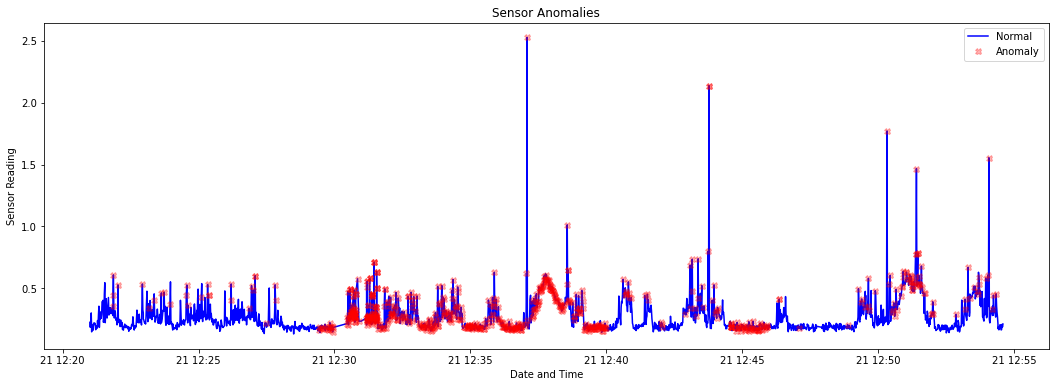

In [28]:
cut_input=df_time_cut.iloc[1:2500]
a_2 = cut_input.loc[df_time_cut['anomaly2'].iloc[1:2500] == -1] #anomaly

_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_time_cut['x_2'].iloc[1:2500], color='blue', label='Normal')
_ = plt.plot(a_2['x_2'].iloc[1:2500], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor Anomalies')
_ = plt.legend(loc='best')

plt.show();

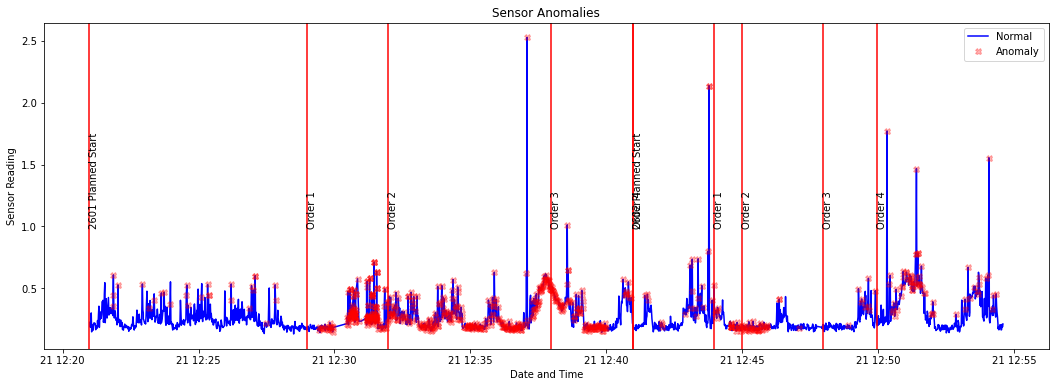

In [29]:
cut_input=df_time_cut.iloc[1:2500]
a_2 = cut_input.loc[df_time_cut['anomaly2'].iloc[1:2500] == -1] #anomaly

_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_time_cut['x_2'].iloc[1:2500], color='blue', label='Normal')
_ = plt.plot(a_2['x_2'].iloc[1:2500], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor Anomalies')
_ = plt.legend(loc='best')

for i in range (0,len(timestamp_marks_Co)):

    plt.axvline(x=merged_data.index[timestamp_marks_Co[i]], color='r', linestyle='-')
    plt.text(merged_data.index[timestamp_marks_Co[i]], 1, timestamp_comments_Co[i],rotation=90)
_ = plt.legend(loc='best')

plt.show();

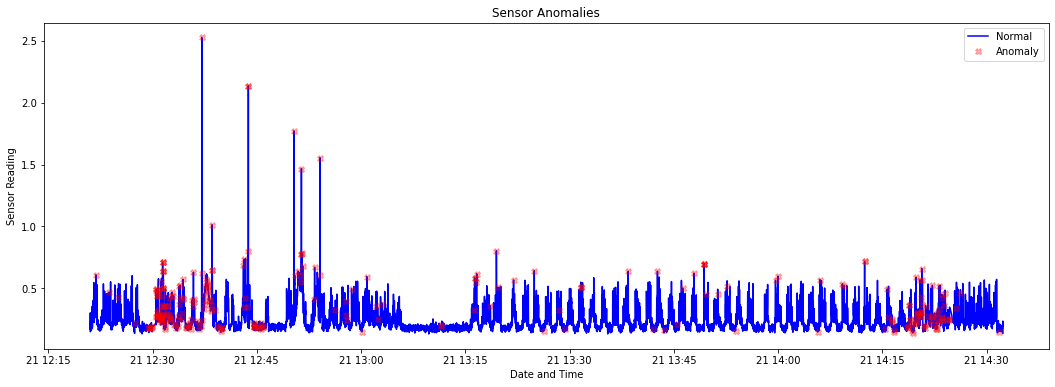

In [31]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies
 
outliers_fraction = 0.03
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))
# visualization
df_time_cut['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df_time_cut.index)
a_2 = df_time_cut.loc[df_time_cut['anomaly2'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_time_cut['x_2'], color='blue', label='Normal')
_ = plt.plot(a_2['x_2'], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor Anomalies')
_ = plt.legend(loc='best')
plt.show();

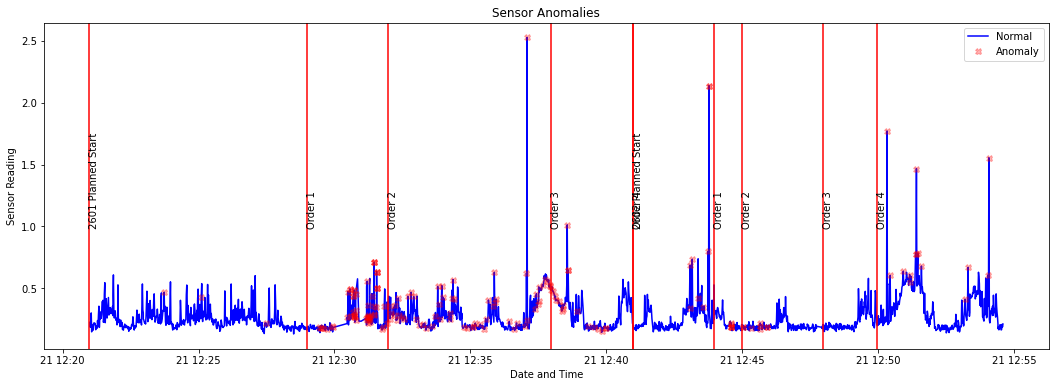

In [32]:
cut_input=df_time_cut.iloc[1:2500]
a_2 = cut_input.loc[df_time_cut['anomaly2'].iloc[1:2500] == -1] #anomaly

_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_time_cut['x_2'].iloc[1:2500], color='blue', label='Normal')
_ = plt.plot(a_2['x_2'].iloc[1:2500], linestyle='none', marker='X', color='red', markersize=6, label='Anomaly',alpha=0.3)
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor Anomalies')
_ = plt.legend(loc='best')

for i in range (0,len(timestamp_marks_Co)):

    plt.axvline(x=merged_data.index[timestamp_marks_Co[i]], color='r', linestyle='-')
    plt.text(merged_data.index[timestamp_marks_Co[i]], 1, timestamp_comments_Co[i],rotation=90)
_ = plt.legend(loc='best')

plt.show();

Wykrywanie zmian dryftu

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from river import drift
# Drift detection
# Generate data for 3 distributions

# Concatenate data to simulate a data stream with 2 drifts
#df_time_cut.reset_index(drop=True, inplace=True)
stream = df_time_cut['x_2']

# Auxiliary function to plot the data
def plot_data(stream, drifts=None):
    fig = plt.figure(figsize=(18,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1 = plt.subplot(gs[0])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    #ax2.grid(axis='y')

    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()



Change detected at index 959
Change detected at index 1375
Change detected at index 2143
Change detected at index 2463
Change detected at index 3519
Change detected at index 4127
Change detected at index 6623
Change detected at index 9439


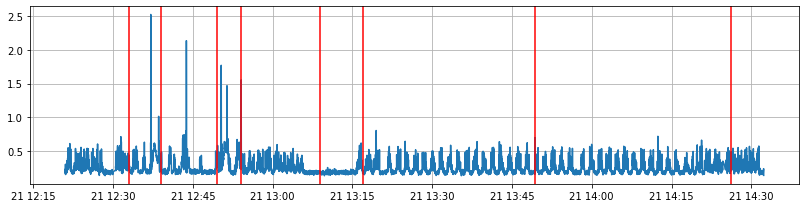

In [75]:
df_time_cut=df.truncate(before=time_stamp_1)

drift_detector = drift.ADWIN()
drifts = []


for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector


df_drift=df_time_cut.iloc[drifts,:]

plot_data(stream,df_drift.index)

In [73]:
def plot_data_with_timestamps(stream, timestamp_marks,drifts=None):
    fig = plt.figure(figsize=(18,6), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1 = plt.subplot(gs[0])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    #ax2.grid(axis='y')

    for i in range (0,len(timestamp_marks)):

        ax1.axvline(x=merged_data.index[timestamp_marks[i]], color='g', linestyle='-')
        ax1.text(merged_data.index[timestamp_marks[i]], 1, timestamp_comments[i],rotation=90)
    _ = ax1.legend(loc='best')



    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()



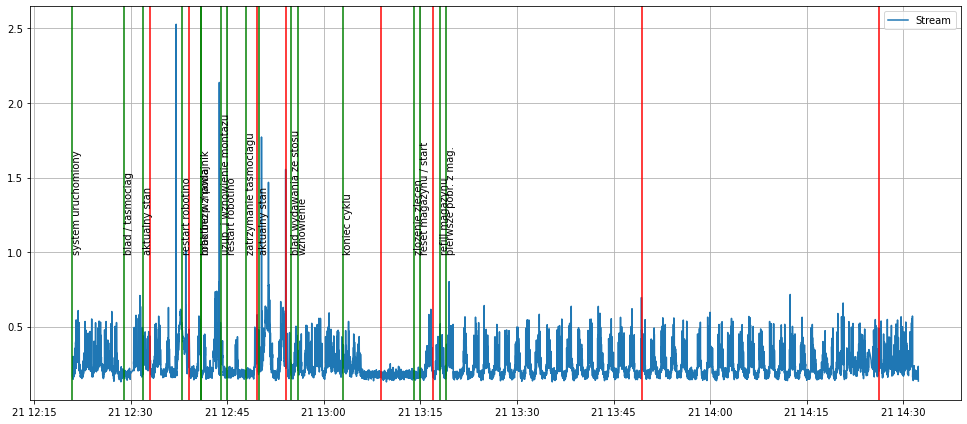

In [74]:
    plot_data_with_timestamps(stream,timestamp_marks,df_drift.index)

Change detected at index 959
Change detected at index 1375
Change detected at index 2143
Change detected at index 2463


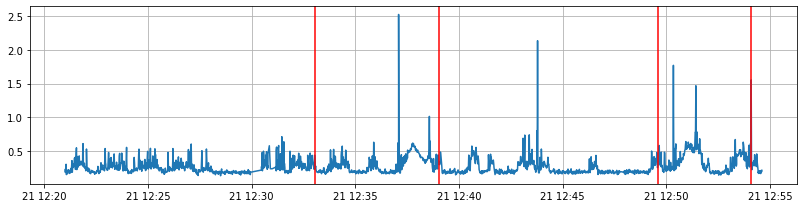

In [80]:
df_time_cut=df.truncate(before=time_stamp_1)
stream = df_time_cut['x_2'].iloc[1:2500]
drift_detector = drift.ADWIN()
drifts = []


for i, val in enumerate(stream):
    drift_detector.update(val)   # Data is processed one sample at a time
    if drift_detector.change_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)
        drift_detector.reset()   # As a best practice, we reset the detector


df_drift=df_time_cut.iloc[drifts,:]

plot_data(stream,df_drift.index)